# Perceptron


In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score


# Perceptron


<img src="https://upload.wikimedia.org/wikipedia/commons/8/86/Iris_setosa.JPG" width="200" height="200" />

Leggiamo il dataset memorizzato come file CSV usando la libreria Pandas.
Pandas ci consente di leggere dati in vari formati, in questo caso CSV (Comma Separated Values), memorizzarli in una struttura dati detta dataframe.
Usando la libreria seaborn vediamo gli scatterplot per le possibili coppie di variabili di ingresso e, sulla diagonale principale, le curve di distribuzione di tutte le variabili con colore associato alla specie di Iris

In [13]:
dati = pd.read_csv("dati iris.csv")
dati.head()


,luSepali,laSepali,luPetali,laPetali,classeIris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Visualizziamo i dati con Seaborn:

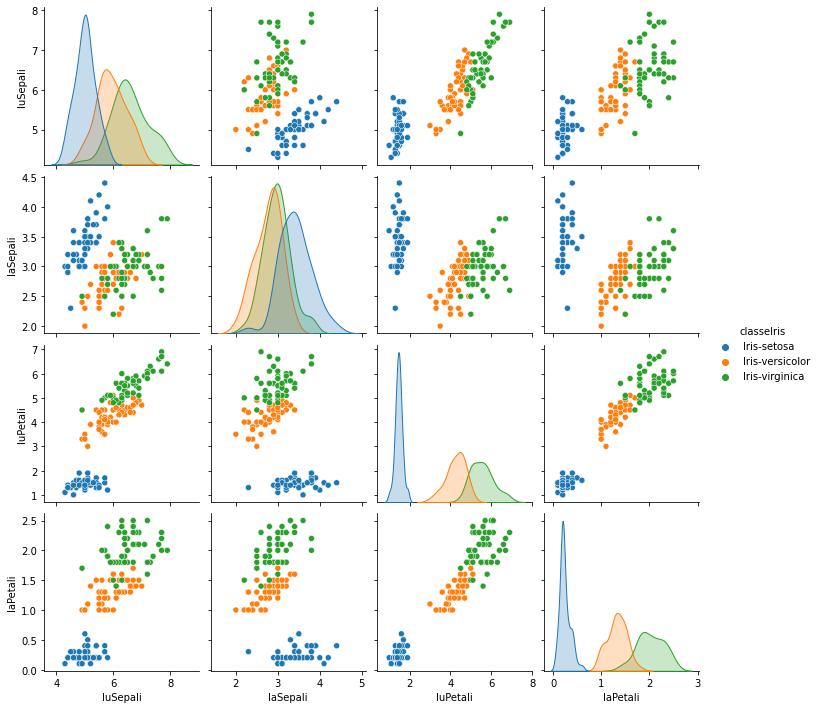

In [14]:
g = sns.pairplot(dati,hue="classeIris")

Come si può facilmente vedere le tre classi sono abbastanza separate.
Arancioni e verdi sono particolarmente separat dai blu.
Siccome il perceptrone è in grado di effettuare classificazioni binarie.
Fondiamo gli arancioni e i verdi insieme creando una nuova colonna "classe" nel dataset che vale 0 per Iris-setosa e 1 per le altre due classi.

In [15]:
dati["classe"]=1
dati.loc[dati["classeIris"] == "Iris-setosa", "classe"] = 0
dati.drop('classeIris', inplace=True, axis=1)

Vediamo il risultato

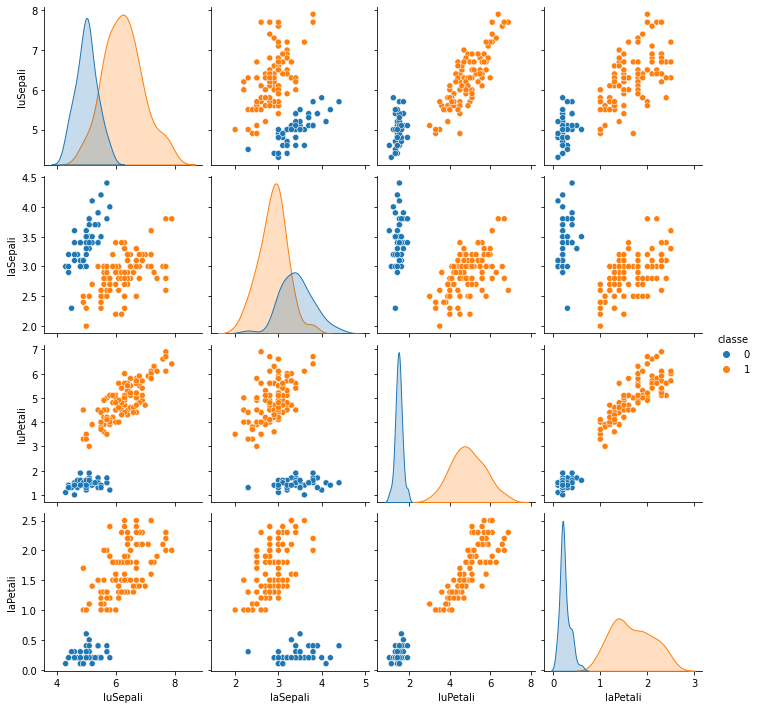

In [7]:
g = sns.pairplot(dati,hue="classe")

Adesso alleniamo il nostro perceptrone usando la libreria scikit.

Proviamo ad utilizzare solo le larghezze e le lunghezze dei petali per classificare i nostri Iris

In [17]:
perceptrone = Perceptron(verbose=0, random_state=None, fit_intercept=True, eta0=0.001)
perceptrone.fit(dati[['luPetali','laPetali']],dati['classe'])

ya = dati['classe']
yp = perceptrone.predict(dati[['luPetali','laPetali']])
print('Accuratezza: %.2f' % accuracy_score(ya, yp))


Accuratezza: 1.00


Adesso alleniamo il perceptrone con tutte e 4 le colonne e vediamo come cambia l'accuratezza:

In [18]:
perceptrone = Perceptron(verbose=0, random_state=None, fit_intercept=True, eta0=0.001)
perceptrone.fit(dati[['luSepali','laSepali','luPetali','laPetali']],dati['classe'])



ya = dati['classe']
yp = perceptrone.predict(dati[['luSepali','laSepali','luPetali','laPetali']])
print('Accuracy: %.2f' % accuracy_score(ya, yp))



Accuracy: 1.00
